# [Week7] 이미지 분석 활용 맛보기

* 과제
    * 문제 1번을 풀어주세요.
    * `2~3번`의 각 실행 코드를 실행해보며, 자신이 이해하기 편하도록 코드를 분석하여 `주석`을 달아주세요.
    * `4번`의 맨 마지막 실습은 `직접 코드를 작성`해주세요.

## 1. 라이브러리 설치

### (1) cvlib : 객체인식, 얼굴인식, 성별인식

* 참고 링크 : [cvlib docs](https://docs.cvlib.net/)
* 혹시 아래 라이브러리를 설치하다가 버전 문제가 생길 때(특히 tensorflow), 해결하기 가장 쉬운 방법은 다음과 같습니다.
    * 주피터 노트북에서 새로운 가상환경을 만들기
    * 모든 라이브러리를 최신 버전으로 다시 다운 받기 (numpy 버전과 tensorflow 버전을 호환되게 맞추기)

In [6]:
# CVlib
!pip install cvlib

In [7]:
# tensorflow
!pip install tensorflow

In [8]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np

> __문제 1번 : cvlib 이용 시 매개변수로 넣는 이미지의 기본 컬러공간(color space)은 무엇이어야 할까요?__

* 답변 : BGR

## 2. 라이브러리 사용 실습

* 참고 링크 : https://github.com/arunponnusamy/cvlib

### 2-1. 객체인식(Object Detection)

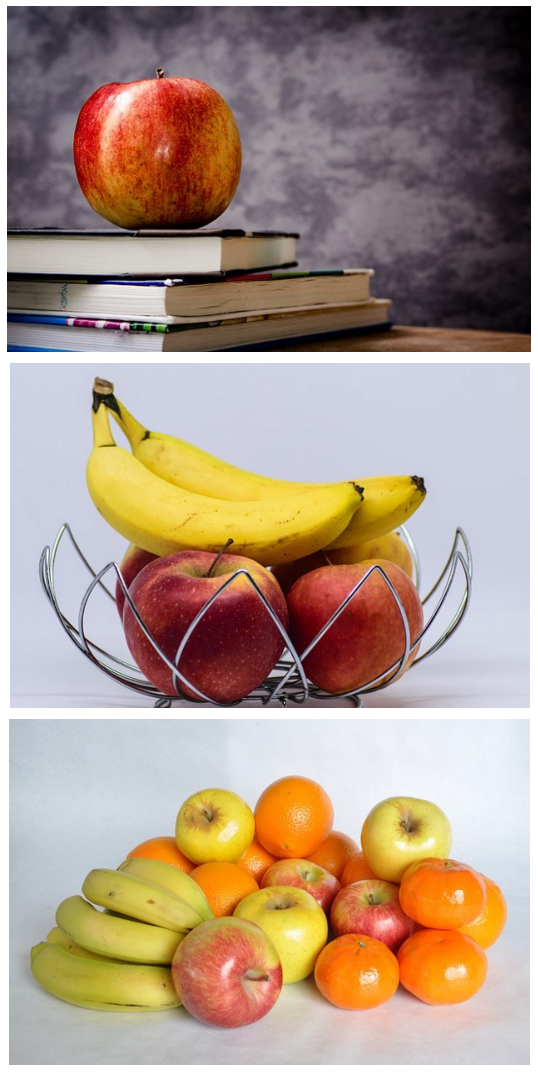

In [9]:
fig = plt.figure(figsize=(15,15))
for i in range(1, 4):
    # read image
    image_path = './image/image'+ str(i) +'.jpeg'
    im = cv2.imread(image_path)
    
    ### object detection ###
    # return the bounding box co-ordinates, correspondnig labels and confidence scores
    # for the detected objects in the image
    bbox, label, conf = cv.detect_common_objects(im)
    
    # draw bounding box over detected objects
    output_image = draw_bbox(im, bbox, label, conf)
    
    # convert an image from BGR to RGB
    # default color space (cvlib: BGR, matplotlib: RGB) 
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    
    # display output
    plt.subplot(3, 1, i)
    plt.imshow(output_image)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### 2-2. 얼굴인식(Face Detection)

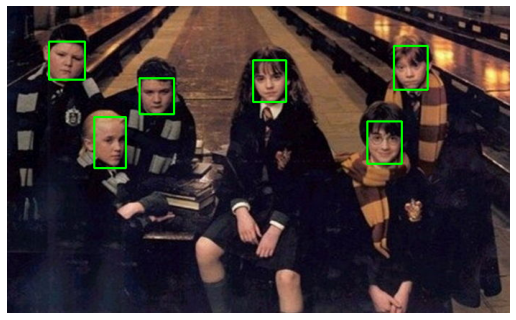

In [10]:
fig = plt.figure(figsize=(9,9))

# read image
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

### face detection ###
# return the bounding box corners and corresponding confidence
# for all the faces detected
faces, confidences = cv.detect_face(im)

# loop through detected faces and add bounding box
for face in faces:
    # get start and end coordinates of the face
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    #- cv2.rectangle(img, start, end, color, thickness)
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)

# convert an image from BGR to RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# display output
plt.imshow(im)
plt.axis('off')
plt.show()

### 2-3. 성별인식(Gender Detection)

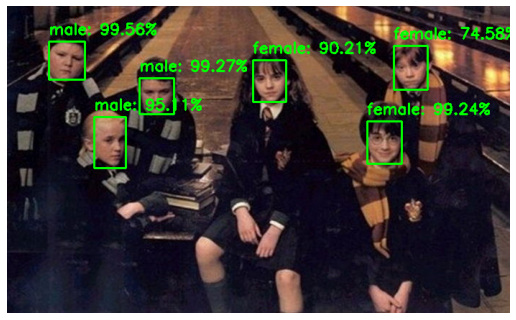

In [11]:
fig = plt.figure(figsize=(9,9))

# read image
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

### face detection ###
# return the bounding box corners and corresponding confidence
# for all the faces detected
faces, confidences = cv.detect_face(im)

# loop through detected faces
for face in faces:
    # get start and end coordinates of the face
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    
    # crop the face from an image
    face_crop = np.copy(im[startY:endY, startX:endX])
    
    ### gender detection ###
    # return the labels (man, woman) and associated probabilities
    (label, confidence) = cv.detect_gender(face_crop)

    # return the index of the maximum value along an axis
    idx = np.argmax(confidence)
    label = label[idx]
    # get gender and associated probabilities
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    # Y coordinate of label
    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # draw rectangle over face
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
    # put label
    cv2.putText(im, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)

# convert an image from BGR to RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# display output
plt.imshow(im)
plt.axis('off')
plt.show()

## 3. 웹캠 입출력

In [12]:
# receive video from <device index> or <the name of a video file>
# -labtop with webcam: the built-in(0) or external(1~n) camera
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    # return a bool (True/False) - if frame is read correctly, status is True
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()
    
    # flip a 2D array (around vertical, horizontal, or both axes)
    #- cv2.flip(src, flip Code)
    #- flip code: 0 means flipping around the x-axis
                #- positive value (e.g. 1) means flipping around y-axis
                #- negative value (e.g. -1) means flipping around both axes
    frame = cv2.flip(frame, 1)
    
    # display an image in a window
    #- cv2.imshow(window_name, img)
    cv2.imshow("Real-time video", frame)

    # end the program when the user presses 'q'
    #- select the low 8 bits of the result cv2.waitKey(1) (0xff = 11111111(binary))
    #- and test if that's eqaul to ASCII value for 'q'
    #- cv2.waitKey(time) return the character code of the currently pressed key, 
    #- return -1 if no key is pressed every <time>
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the memory received from the camera device
webcam.release()
# close all windows
cv2.destroyAllWindows()

## 4. 나만의 프로그램 만들기 (직접 코드 작성)

* 실습 내용 : `웹캠 입출력`과 `객체인식 or 얼굴인식+성별인식` 코드를 합친 코드를 작성하세요.
    * 후보1 : 웹캠 입출력 + 객체인식 프로그램
    * 후보2 : 웹캠 입출력 + 얼굴인식+성별인식 프로그램

* 나의 선택 : 후보 ( 2 ) 번

In [13]:
# open webcam
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    # return a bool (True/False) - if frame is read correctly, status is True
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()
    
    # flip a 2D array (around vertical, horizontal, or both axes)
    frame = cv2.flip(frame, 1)
    
    ### face detection ###
    faces, confidences = cv.detect_face(frame)
    
    # loop through detected faces
    for face in faces:
        # get start and end coordinates of the face
        (startX,startY) = face[0],face[1]
        (endX,endY) = face[2],face[3]

        try:
            # crop the face from an frame
            face_crop = np.copy(frame[startY:endY, startX:endX])        
            ### gender detection ###
            (label, confidence) = cv.detect_gender(face_crop)
        except Exception as e:
            pass

        # return the index of the maximum value along an axis
        idx = np.argmax(confidence)
        label = label[idx]
        # get gender and associated probabilities
        label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

        # Y coordinate of label
        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # draw rectangle over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
        # put label
        cv2.putText(frame, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0,255,0), 2)    
    
    # display an image in a window
    cv2.imshow("Real-time video", frame)

    # end the program when the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the memory received from the camera device
webcam.release()
# close all windows
cv2.destroyAllWindows()